In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from skimage.io import imread, imshow

In [83]:
train_data = pd.read_json('train.json')
train_data.head(1000)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street,medium
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street,low
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street,low
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace,medium
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th,low


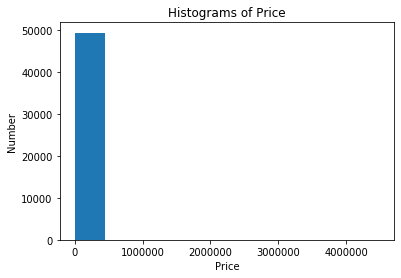

In [84]:
plt.hist(train_data['price'])
plt.title('Histograms of Price')
plt.xlabel('Price')
plt.ylabel('Number')
plt.show()

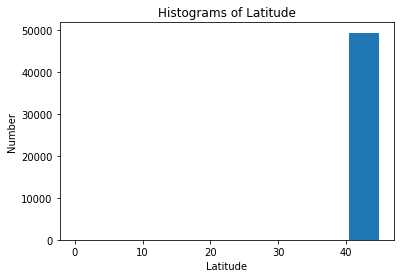

In [85]:
plt.hist(train_data['latitude'])
plt.title('Histograms of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Number')
plt.show()

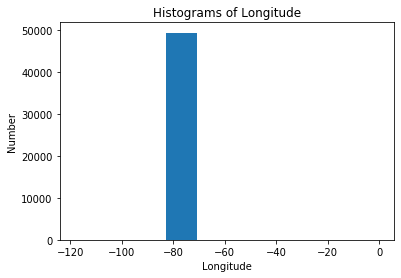

In [86]:
plt.hist(train_data['longitude'])
plt.title('Histograms of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Number')
plt.show()

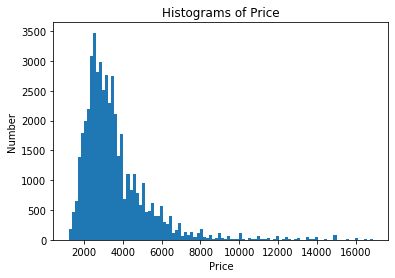

In [87]:
# Plot histograms for the numeric columns of Price
train_data_price = train_data[train_data['price'] <= np.percentile(train_data['price'],99.6)]
train_data_price = train_data_price[train_data_price['price'] >= np.percentile(train_data['price'],0.1)]
plt.hist(train_data_price['price'],bins=100)
plt.title('Histograms of Price')
plt.xlabel('Price')
plt.ylabel('Number')
plt.show()

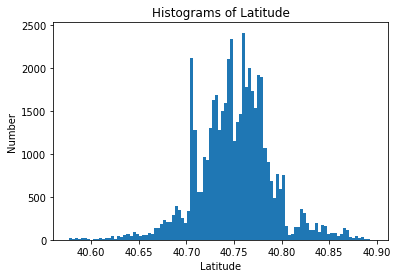

In [88]:
# Plot histograms for the numeric columns of Latitude
train_data_latitude = train_data[train_data['latitude'] <= np.percentile(train_data['latitude'],99.9)]
train_data_latitude = train_data_latitude[train_data_latitude['latitude'] >= np.percentile(train_data['latitude'],0.1)]
plt.hist(train_data_latitude['latitude'],bins=100)
plt.title('Histograms of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Number')
plt.show()

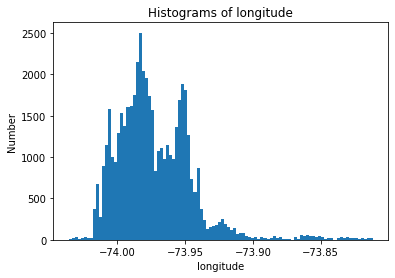

In [89]:
# Plot histograms for the numeric columns of Longitude
train_data_longitude = train_data[train_data['longitude'] <= np.percentile(train_data['longitude'],99.8)]
train_data_longitude = train_data_longitude[train_data_longitude['longitude'] >= np.percentile(train_data['longitude'],0.1)]
plt.hist(train_data_longitude['longitude'],bins=100)
plt.title('Histograms of longitude')
plt.xlabel('longitude')
plt.ylabel('Number')
plt.show()

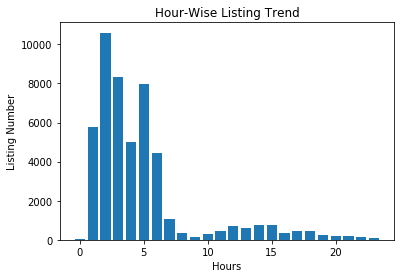

In [90]:
# Plot hour-wise listing trend and find out the top 5 busiest hours of postings
train_data['created'] = pd.to_datetime(train_data['created'])
train_data['hour'] = train_data['created'].dt.hour
group_by_hour = train_data.groupby(train_data['hour'])
number_by_hour = group_by_hour['hour'].count()
plt.bar(range(24),number_by_hour)
plt.title('Hour-Wise Listing Trend')
plt.xlabel('Hours')
plt.ylabel('Listing Number')
plt.show()

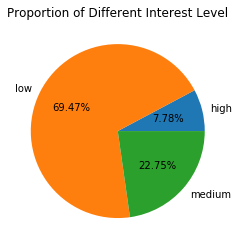

In [91]:
# Visualization to show the proportion of target variable values
group_by_interest = train_data.groupby(train_data['interest_level'])
number_in_level = group_by_interest['interest_level'].count()
plt.pie(number_in_level,autopct='%1.2f%%',labels = ['high','low','medium'])
plt.title('Proportion of Different Interest Level')
plt.show()

In [92]:
# Find out the number of missing values in each variable
bathrooms_missing = train_data[(train_data['bathrooms'] == 0.0)]
print("The number of missing values in bathrooms variable is", len(bathrooms_missing))

bedrooms_missing = train_data[(train_data['bedrooms'] == 0)]
print("The number of missing values in bedrooms variable is", len(bedrooms_missing))

building_id_missing = train_data[train_data['building_id'] == "0"]
print("The number of missing values in building_id variable is", len(building_id_missing))

created_missing = train_data[train_data['created'] == None]
print("The number of missing values in created variable is", len(created_missing))

description_missing = train_data[train_data['description'] == " "]
print("The number of missing values in description variable is", len(description_missing))

display_address_missing = train_data[train_data['display_address'] == " "]
print("The number of missing values in display_address variable is", len(display_address_missing))

features_missing = train_data[train_data['features'] == "[]"]
print("The number of missing values in features variable is", len(features_missing))

latitude_missing = train_data[train_data['latitude'] == 0.0]
print("The number of missing values in latitude variable is", len(latitude_missing))

listing_id_missing = train_data[train_data['listing_id'] == None]
print("The number of missing values in listing_id variable is", len(listing_id_missing))

longitude_missing = train_data[train_data['longitude'] == 0.0]
print("The number of missing values in longitude variable is", len(longitude_missing))

manager_id_missing = train_data[train_data['manager_id'] == " "]
print("The number of missing values in manager_id variable is", len(manager_id_missing))

photos_missing = train_data[train_data['photos'] == None]
print("The number of missing values in photos variable is", len(photos_missing))

price_missing = train_data[train_data['price'] == 0]
print("The number of missing values in price variable is", len(price_missing))

street_address_missing = train_data[train_data['street_address'] == " "]
print("The number of missing values in street_address variable is", len(street_address_missing))

interest_level_missing = train_data[train_data['interest_level'] == " "]
print("The number of missing values in interest_level variable is", len(interest_level_missing))

The number of missing values in bathrooms variable is 313
The number of missing values in bedrooms variable is 9475
The number of missing values in building_id variable is 8286
The number of missing values in created variable is 0
The number of missing values in description variable is 239
The number of missing values in display_address variable is 2
The number of missing values in features variable is 0
The number of missing values in latitude variable is 12
The number of missing values in listing_id variable is 0
The number of missing values in longitude variable is 12
The number of missing values in manager_id variable is 0
The number of missing values in photos variable is 0
The number of missing values in price variable is 0
The number of missing values in street_address variable is 0
The number of missing values in interest_level variable is 0


In [93]:
# Can we safely drop the missing values? If not, how will you deal with them?
# The missing value of bathrooms or bedrooms would not be dropped, and the zero number about bathrooms or bedrooms may be reasonal.
# The missing value of building_id, created, description, display_address, features, listing_id, manager_id, photos, street_address, and interest_level can be recoved, so they would not be dropped.
# There is no missing value of price.
# The missing value of latitude and longitude can be find according to the street_address, so they would not be dropped.

In [94]:
# Find out the number of outliers in each variable
bathrooms_zscore = np.abs(stats.zscore(train_data['bathrooms']))
bathrooms_outliers = 0
for i in range(len(bathrooms_zscore)):
    if bathrooms_zscore[i] > 3:
        bathrooms_outliers = bathrooms_outliers + 1

print("The number of outliers in bathrooms variable:", bathrooms_outliers)

bedrooms_zscore = np.abs(stats.zscore(train_data['bedrooms']))
bedrooms_outliers = 0
for i in range(len(bedrooms_zscore)):
    if bedrooms_zscore[i] > 3:
        bedrooms_outliers = bedrooms_outliers + 1

print("The number of outliers in bedrooms variable:", bedrooms_outliers)

latitude_zscore = np.abs(stats.zscore(train_data['latitude']))
latitude_outliers = 0
for i in range(len(latitude_zscore)):
    if latitude_zscore[i] > 3:
        latitude_outliers = latitude_outliers + 1

print("The number of outliers in latitude variable:", latitude_outliers)

longitude_zscore = np.abs(stats.zscore(train_data['longitude']))
longitude_outliers = 0
for i in range(len(longitude_zscore)):
    if longitude_zscore[i] > 3:
        longitude_outliers = longitude_outliers + 1

print("The number of outliers in longitude variable:", longitude_outliers)

price_zscore = np.abs(stats.zscore(train_data['price']))
price_outliers = 0
for i in range(len(price_zscore)):
    if price_zscore[i] > 3:
        price_outliers = price_outliers + 1

print("The number of outliers in price variable:", price_outliers)

The number of outliers in bathrooms variable: 1035
The number of outliers in bedrooms variable: 297
The number of outliers in latitude variable: 18
The number of outliers in longitude variable: 16
The number of outliers in price variable: 10


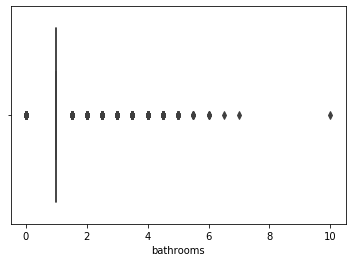

In [95]:
# Plot visualizations to demonstrate outliers
sns.boxplot(x = train_data['bathrooms'])

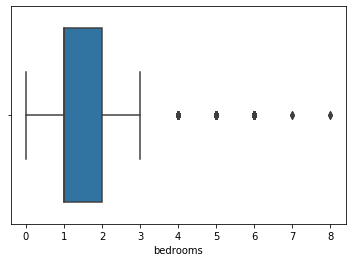

In [96]:
sns.boxplot(x = train_data['bedrooms'])

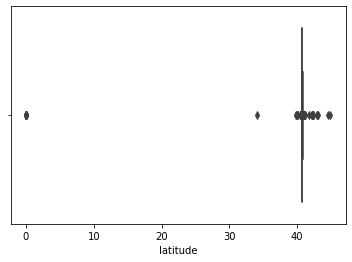

In [97]:
sns.boxplot(x = train_data['latitude'])


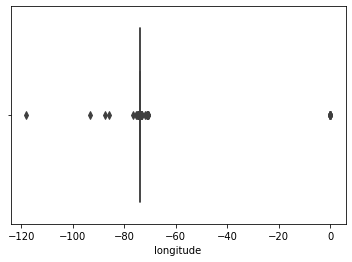

In [98]:
sns.boxplot(x = train_data['longitude'])

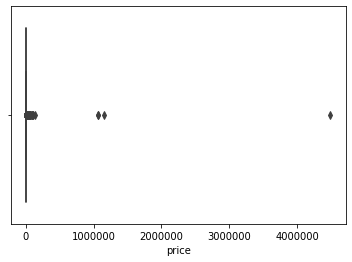

In [99]:
sns.boxplot(x = train_data['price'])

In [100]:
# The values of building_id, created, description, display_address, features, listing_id, manager_id, photos, street_address, and interest_level are in text, so it is not meaningful to detect their outliers.
# The outliers of bathrooms and bedrooms are possible reansonalbe, so we keep them.
# The outliers of latitude and longitude can be modified according to the street_address, so they keep them.
# The outliers of price can be removed.

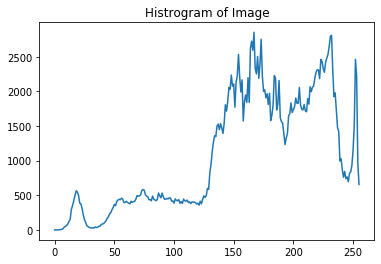

In [101]:
# Extract features from the images and transform it into data that’s ready to be used in the model for classification.

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images_sample/images_sample/6811957/6811957_3dad56e8bf3477b2900ca39d57df041e.jpg')
histrogram = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(histrogram) 
plt.title('Histrogram of Image')
plt.show() 

In [102]:
image.shape

(426, 640, 3)

In [103]:
# https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/

image_feature_matrix = np.zeros((426, 640)) 
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        image_feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)

image_features = np.reshape(image_feature_matrix, (426*640)) 
image_features.shape

(272640,)

In [104]:
image_features

array([192.33333333, 192.33333333, 192.33333333, ...,  74.        ,
        77.        ,  77.        ])

In [105]:
#Extract features from the text data and transform it into data that’s ready to be used in the model for classification

In [106]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english'))
desc = train_data['description']
feat = train_data['features']
word_tokens = []
word_tokens_desc = word_tokenize(str(desc))
word_tokens_feat = word_tokenize(str(feat))
word_tokens.extend(word_tokens_desc)
word_tokens.extend(word_tokens_feat)
temp = []
for w in word_tokens:
    if w.isalpha() and (w.lower() not in stop_words):
        temp.append(w)
        
word_tokens_final = []
for w in temp:
    word_tokens_final.append(w.lower())

In [107]:
from collections import Counter
word_freq= (Counter(word_tokens_final))
print(word_freq)

Counter({'doorman': 29, 'elevator': 28, 'allowed': 24, 'bedroom': 19, 'laundry': 17, 'dogs': 15, 'cats': 14, 'building': 12, 'hardwood': 12, 'floors': 11, 'fitness': 10, 'apartment': 10, 'center': 9, 'dishwasher': 9, 'spacious': 8, 'one': 8, 'fee': 7, 'unit': 6, 'great': 6, 'luxury': 6, 'renovated': 5, 'studio': 5, 'pool': 5, 'beautiful': 4, 'features': 4, 'prewar': 4, 'room': 4, 'swimming': 4, 'roof': 4, 'deck': 4, 'bath': 3, 'top': 3, 'huge': 3, 'sunny': 3, 'full': 3, 'dining': 3, 'common': 3, 'outdoor': 3, 'space': 3, 'allo': 3, 'new': 2, 'west': 2, 'village': 2, 'location': 2, 'stunning': 2, 'p': 2, 'bed': 2, 'square': 2, 'high': 2, 'east': 2, 'two': 2, 'miss': 2, 'true': 2, 'gut': 2, 'stainless': 2, 'walk': 2, 'r': 2, 'living': 2, 'block': 2, 'park': 2, 'br': 2, 'large': 2, 'central': 2, 'par': 2, 'name': 2, 'length': 2, 'dtype': 2, 'object': 2, 'eat': 2, 'har': 2, 'balcony': 2, 'uni': 2, 'furnished': 2, 'cat': 2, 'brand': 1, 'apartmentenjoy': 1, 'amenities': 1, 'garage': 1, 'gard